# Logistic Regression(Multiclass Classification)
<img src='123.png'>
<img src='14.png'>

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [107]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [108]:
digits.data[0]    # 8x8 1d array represents the first image of 1797 image dataset

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

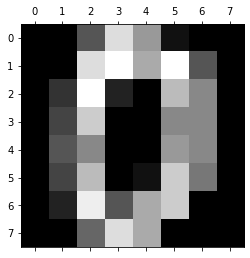

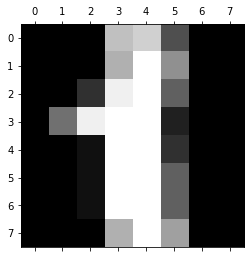

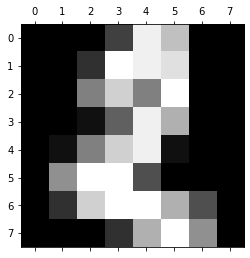

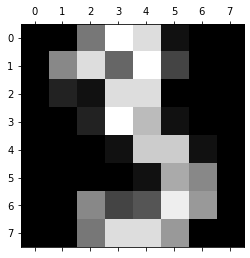

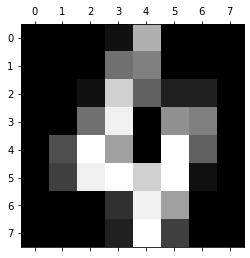

In [109]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [110]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

**Create and train logistic regression model**

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [113]:
len(X_train)

1437

In [114]:
len(X_test)

360

In [115]:
len(y_train)

1437

In [116]:
len(y_test)

360

In [117]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [118]:
model.fit(X_train, y_train)

C:\Users\MD GOLAM RABBANI\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Measure accuracy of our model**

In [119]:
model.score(X_test, y_test) # Accuracy = 97%

0.9694444444444444

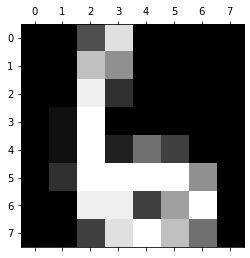

In [120]:
plt.matshow(digits.images[67])

In [121]:
digits.target[67]

6

In [122]:
model.predict([digits.data[67]])

array([6])

In [123]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

**Find where Model accuracy are failing (Using confusion matrix)**

In [124]:
y_prediceted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

In [125]:
cm = confusion_matrix(y_test, y_prediceted)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 28,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 38,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  1,  0, 36,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 28,  0,  1],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 34]], dtype=int64)

Text(69.0, 0.5, 'Truth')

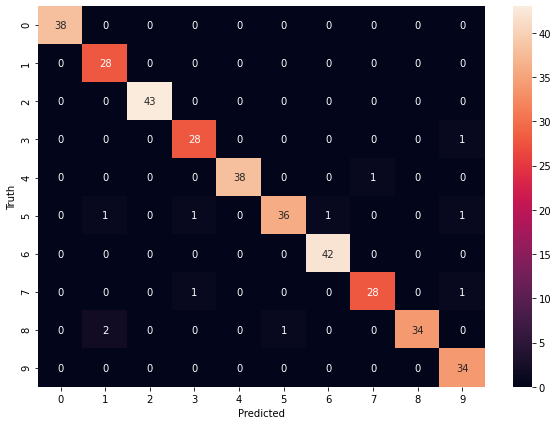

In [130]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

2 times my images were of digit 8 but my model predicted it to be 1. So in this case our model is not good